# Invariant Subspaces

In this chapter we will deal with transformations induced by square
matrices. In particular, we will be interested in directions which are
not modified by a transformation, i.e., such that
$\mathbf{A} \mathbf{v} \propto \mathbf{v}$. Nonzero linearly independent
vectors lying in these directions, together with those which lie in the
null space of the transformation, will be called eigenvectors. The
scalars which settle the equality in the equation above are called
eigenvalues: $\mathbf{A} \mathbf{v} = \lambda \mathbf{v}$.

Contrary to most linear algebra texts, we avoid mentioning determinants
in the definition of eigenvalues and eigenvectors. In the ensuing
sections, we will try our best to keep determinants out of the equation.
We invite the reader to abandon momentarily any algebraic urge to form
polynomials and extract roots, which is the usual way to calculate
eigenvalues.

Definition: Let $\mathbf{A}$ be a linear operator in $\mathbf{U}$ . An
invariant subspace $\mathbf{\mathcal{V}} \subseteq \mathbf{\mathcal{U}}$
under A is any subset $\mathcal{V}$ of U such that if
$v \in \mathcal{V}$ then $A(v) \in \mathcal{V}$. The **figure 5.1.1**
bellow illustrates the definition.

<figure>
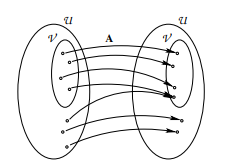
<figcaption aria-hidden="true"></figcaption>
</figure>

**Figure 5.1.1** Invariant subspace under a transformation $\mathbf{A}$

It is clear that $\{0\}$ is always an invariant subspace, and so is the
whole space $\mathcal{W}$. In this chapter, we are interested in
invariant subspaces whose dimension is one. We want to study
$\mathcal{V} \subseteq \mathcal{W}$ which has dimension equal to one and
is invariant under a linear transformation $\mathbf{A}$. Therefore, any
vector $\mathbf{v} \in \mathcal{V}$ is such that
$\mathbf{A}(\mathbf{v}) = \lambda \mathbf{v} \Rightarrow \mathbf{A} \mathbf{v} \in \mathcal{V} \Rightarrow
\mathbf{A} \mathbf{v} \propto \mathbf{v}$.

$$\mathbf{A} =
\begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}$$

**Figure 5.1.2 (a)** shows the transformation $\mathbf{A}$ applied onto
vector $\mathbf{v}_1 = [2 \ 1]^\top$. We see the effect is that the
result of the transformation, $\mathbf{A}(\mathbf{v}_1)$, does not
belong to the one-dimensional subspace $\mathcal{V}_1$ which contains
$\mathbf{v}_1$. On the other hand, when applied to vector
$\mathbf{v}_2$, as seen in **Figure 5.1.2 (b)**, the result of the
transformation lies within the same subspace $\mathcal{V}_2$ which
contains $\mathbf{v}_2$.

<figure>
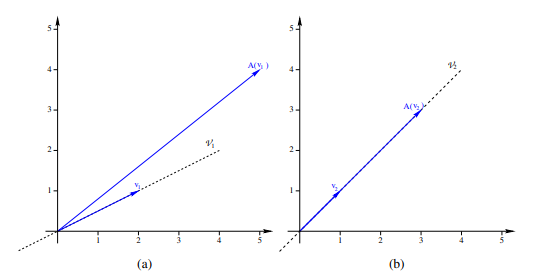
<figcaption aria-hidden="true"></figcaption>
</figure>

**Figure 5.1.2** Application of transformation A to a vector which does
not belong to the one-dimensional invariant subspace z**(a)** and to a
vector which belongs to the one-dimensional invariant subspace **(b)**.

### Applications
A **low-pass filter** in signal processing allows low-frequency components to pass while attenuating high-frequency components (above or equal to the ***cutoff*** value). This is often used to remove noise or smooth a signal, preserving the essential, slower-changing parts of the data. The filter can be implemented mathematically by applying a Fourier transform, where the high-frequency components are selectively dampened.

In linear algebra, an invariant space refers to a subspace that remains unchanged under the action of a given linear transformation. If a vector space ***V*** has a subspace ***W*** such that applying a linear transformation ***T*** to any vector in ***W*** results in another vector still within  ***W***, then ***W*** is invariant under ***T***.

The connection between low-pass filters and invariant spaces arises when we think of the signal or data being transformed in a vector space. In the Fourier domain, the frequencies of a signal can be viewed as the basis vectors of a vector space. A low-pass filter essentially projects the signal onto the subspace spanned by low-frequency components. This projection defines an invariant subspace for the filter operator, meaning the low-frequency components (the essential features of the signal) are left unchanged, while high-frequency components are suppressed, as if they belong to a "non-invariant" space for the low-pass operator. Therefore, a low-pass filter can be seen as creating or isolating an invariant subspace where low-frequency data is preserved, while filtering out components that do not belong to this space.  


The ***"Fast Fourier Transform" (FFT)*** is an important measurement method in the science of audio and acoustics measurement. It converts a signal into individual spectral components and provides frequency information about the signal. FFTs are used for fault analysis, quality control, and condition monitoring of machines or systems.  
    
A signal is sampled over a period of time and divided into its frequency components. These components are single sinusoidal oscillations at distinct frequencies each with their own amplitude and phase. This transformation is illustrated in the following diagram. Over the time period measured, the signal contains 3 distinct dominant frequencies. 

![FFT](https://www.nti-audio.com/portals/0/pic/news/FFT-Time-Frequency-View-540.png)

We can see those dominant frequencies as a basis for our invariant space. In the context of the following low-pass filter example, the invariant space consists of the frequency components that we aim to preserve. The filtering process can be seen as a projection operation onto the invariant subspace of low frequencies. The high-frequency components, which lie outside this subspace, are effectively removed (or projected to zero). Mathematically, this can be viewed as projecting the noisy signal onto the subspace spanned by the low-frequency components, ensuring that only the desired frequencies remain in the filtered signal

This concept can be extended to many areas in signal processing, where invariant spaces are fundamental for efficient analysis, reconstruction, and processing of signals.

In the example bellow, you'll be able to select a frequency value for the original signal and a noise frequency that'll be applied to it. Using the FFT, we'll able split the original signal into it's frequencies components and then eliminate the noise (high frequencies). By modifying the codes in it's indicated portion, you can chose the cutoff frequency.  

***NOTE***: Increasing noise frequency, the noisy signal may obscure the clean signal, especially if it approaches or exceeds the signal frequency. The filter will attempt to remove this high-frequency noise, but if the signal itself is also high-frequency, some of the clean signal may be lost as well. In this case, all the frequencies above 10hz are being filtered, so if you set a Signal Frequency to a value bigger or equal to 10hz, the original signal will also be filtered (not what we want). You can alter the cutoff frequency directly in the code.

In [1]:
%pip install numpy matplotlib scikit-learn
%pip install -q ipywidgets==8.0.7 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


In [5]:


# Function to generate and filter the signal
def plot_filtered_signal(signal_freq, noise_freq):
    # Parameters
    freq_sample = 1000  # Sampling frequency (Hz)
    t = np.arange(0, 1.0, 1/freq_sample)  # Time vector (1 second)

    # Generate a clean signal (sine wave)
    clean_signal = np.sin(2 * np.pi * signal_freq * t)
    # Generate noise
    noise = 0.5 * np.sin(2 * np.pi * noise_freq * t)
    # Create the noisy signal
    noisy_signal = clean_signal + noise

    # Apply FFT to find the dominant frequencies
    fft_noisy = np.fft.fft(noisy_signal)
    frequencies = np.fft.fftfreq(len(fft_noisy), 1/freq_sample)

    #>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Design a low-pass filter (cutoff frequency) <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    cutoff_freq = 30  # Cutoff frequency (Hz) <<<<<<< you can adjust it :)
    filter_mask = np.abs(frequencies) < cutoff_freq
    # Apply the low-pass filter in the frequency domain
    fft_filtered = fft_noisy * filter_mask

    # Inverse FFT to get the filtered signal
    filtered_signal = np.fft.ifft(fft_filtered)

    # Clear previous plots
    plt.clf()

    # Plot the results
    plt.figure(figsize=(12, 8))

    # Original clean signal
    plt.subplot(3, 1, 1)
    plt.plot(t, clean_signal, label='Clean Signal ({} Hz)'.format(signal_freq), color='blue')
    plt.title('Clean Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()

    # Noisy signal
    plt.subplot(3, 1, 2)
    plt.plot(t, noisy_signal, label='Noisy Signal ({} Hz + {} Hz)'.format(signal_freq, noise_freq), color='red')
    plt.title('Noisy Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()

    # Filtered signal
    plt.subplot(3, 1, 3)
    plt.plot(t, filtered_signal.real, label='Filtered Signal', color='green')
    plt.title('Filtered Signal (Low-Pass Filter)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to handle button click
def on_plot_button_clicked(b):
    with output_area:
        output_area.clear_output()  # Clear previous plots
        plot_filtered_signal(signal_freq_widget.value, noise_freq_widget.value)


# Create widgets
signal_freq_widget = widgets.FloatSlider(value=5.0, min=1.0, max=50.0, step=1.0, description='Signal Frequency (Hz):',
                                         continuous_update=False)

noise_freq_widget = widgets.FloatSlider(value=50.0,min=1.0,max=100.0,step=1.0,description='Noise Frequency (Hz):',
                                        continuous_update=False)
# Button to plot the graphics
plot_button = widgets.Button(description="Plot Signal")
# Create an output area for the plots
output_area = widgets.Output()
# Link the button to the plotting function
plot_button.on_click(on_plot_button_clicked)

# Display the widgets and button
display(signal_freq_widget, noise_freq_widget, plot_button, output_area)


FloatSlider(value=5.0, continuous_update=False, description='Signal Frequency (Hz):', max=50.0, min=1.0, step=…

FloatSlider(value=50.0, continuous_update=False, description='Noise Frequency (Hz):', min=1.0, step=1.0)

Button(description='Plot Signal', style=ButtonStyle())

Output()

### References

https://www.nti-audio.com/en/support/know-how/fast-fourier-transform-fft

https://www.youtube.com/watch?v=E8HeD-MUrjY&ab_channel=SteveBrunton

Anton, H., & Rorres, C. (2010). Elementary linear algebra: Applications version (10th ed.). John Wiley & Sons.

<br>
<p style="text-align:left;">
    <a href="4.1 - PLU DECOMPOSITION.ipynb">⬅️PREVIOUS</a>
    <span style="float:right;">
        <a href="5.2 - EXISTENCE OF EIGENVALUES AND EIGENVECTORS.ipynb" >NEXT➡️</a>
    </span>
</p>